In [1]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
df.shape

(891, 15)

In [12]:
df.dropna().shape

(182, 15)

In [15]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation

# mean value imputatioon

<AxesSubplot: xlabel='age', ylabel='Count'>

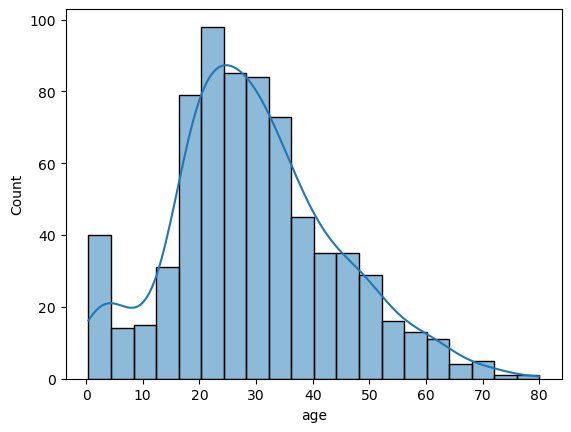

In [21]:
sns.histplot(df.age, kde=True)

In [27]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [28]:
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [37]:
df.drop('age_med',axis=1,inplace=True)

## Median Value imputation - if we have outlies in data set

In [39]:
df['age_median']=df['age'].fillna(df.age.median())

In [43]:
df[['age','age_median']]

,age,age_median
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,28.0
889,26.0,26.0


## Median Value mode - categorical 

In [49]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [51]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [61]:
mode= df[df['embarked'].notna()]['embarked'].mode()[0]

In [62]:
df['emarrked_mod']=df['embarked'].fillna(mode)

In [67]:
df[df.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,emarrked_mod
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,S
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,S


# Class 150 -  Handling Imbalance Dataset

## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [8]:
import numpy as np


In [9]:
np.random.seed(123)


In [15]:
len(np.random.normal(0,1,900))

900

In [16]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [17]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [18]:
class_1

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [20]:
df =pd.concat([class_0,class_1]).reset_index(drop=True)

In [21]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [24]:
df.target.value_counts()

0    900
1    100
Name: target, dtype: int64

In [36]:
df_minor = df[df['target']==1]

In [37]:
df_major=df[df['target']==0]

In [39]:
df_minor

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [38]:
from sklearn.utils import resample

In [49]:
# Upslampling
df_minor_upsample = resample(df_minor,replace=True,n_samples=len(df_major),random_state=42)

In [50]:
df_minor_upsample.shape

(900, 3)

In [53]:
pd.concat([df_major,df_minor_upsample])['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [57]:
#downsmapling
df_major_down = resample(df_major,replace=False,n_samples=len(df_minor),random_state=42)

In [58]:
df_major_down.shape

(100, 3)

In [59]:
downsmapling = pd.concat([df_major_down,df_minor])

In [62]:
downsmapling.target.value_counts()

0    100
1    100
Name: target, dtype: int64

## SMOTE(Synthetic Minority Oversampling Technique)

In [33]:
from sklearn.datasets import make_classification

In [34]:
X,y = make_classification(n_samples=1000, n_redundant=0, n_features=2,n_clusters_per_class=1,
                          random_state=12,weights=[0.9])

In [35]:
import pandas as pd

In [36]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)

In [37]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [38]:
final_df.head(2)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0


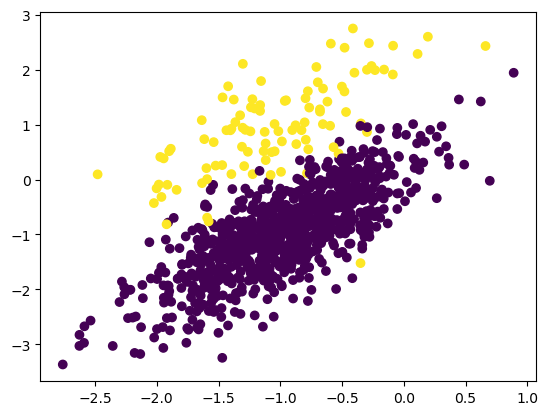

In [39]:
import matplotlib.pyplot as plt
plt.scatter(final_df.f1,final_df.f2,c=final_df.target)

In [29]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
## Tranforming the dataset

In [43]:
oversample = SMOTE()

In [44]:
X,y= oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [45]:
X.shape

(1800, 2)

In [46]:
y.shape

(1800,)

In [47]:
len(y[y==0])

900

In [48]:
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2= pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)

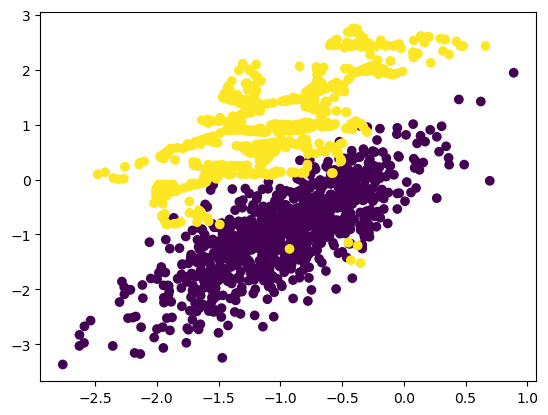

In [49]:
plt.scatter(final_df.f1,final_df.f2,c=final_df.target)

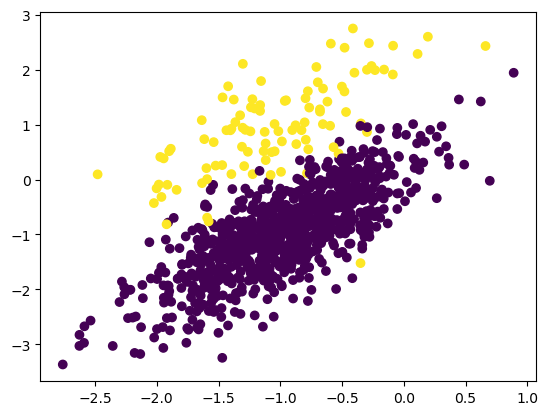

In [40]:
import matplotlib.pyplot as plt
plt.scatter(final_df.f1,final_df.f2,c=final_df.target)

## Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

In [1]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])


In [2]:
import matplotlib.pyplot as plt

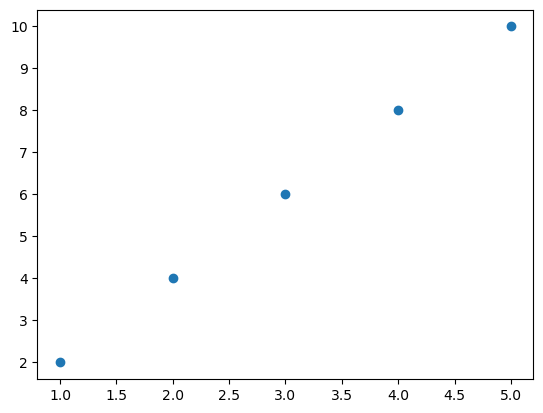

In [3]:
plt.scatter(x,y)

In [4]:
# interpolate the data using linear interpolation
x_n=np.linspace(1,5,10)
x_n

array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
       3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ])

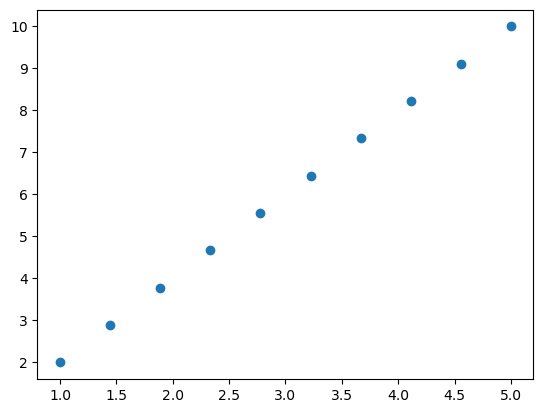

In [11]:
plt.scatter(x_n,np.interp(x_n,x,y))

In [6]:
y_inter = np.interp(x_n,x,y)

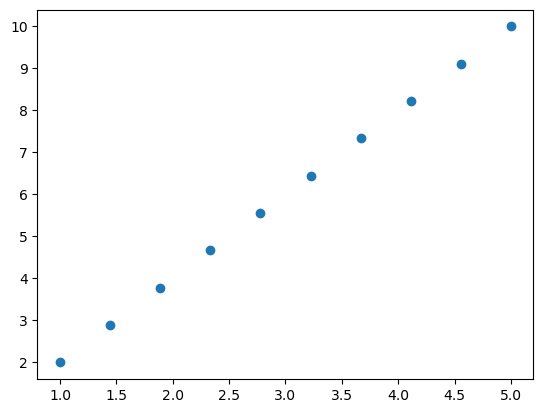

In [7]:
plt.scatter(x_n,y_inter)

In [10]:
np.linspace(1,100,5)

array([  1.  ,  25.75,  50.5 ,  75.25, 100.  ])

## 2. Cubic Interpolation With Scipy

In [13]:
x=np.array([1,2,3,4,5])
y=np.array(x**3)

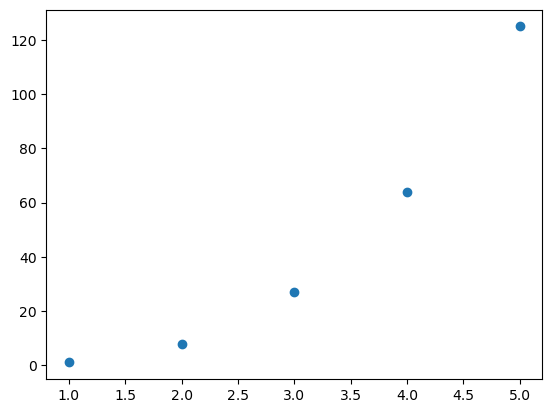

In [14]:
plt.scatter(x,y)

In [15]:
from scipy.interpolate import interp1d

In [16]:
f=interp1d(x,y,kind='cubic')

In [17]:
x_n=np.linspace(1,5,10)

In [21]:
y_inter = f(x_n)
y_inter

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

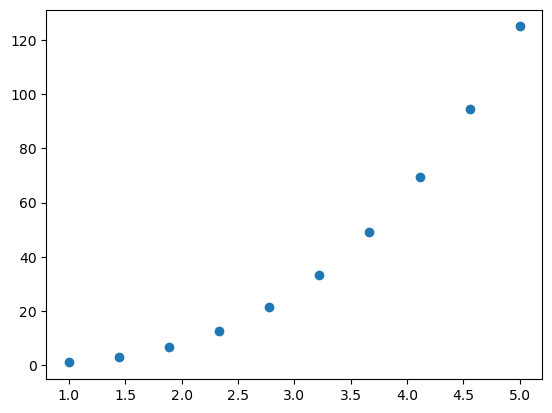

In [22]:
plt.scatter(x_n,y_inter)

## 3. Polynomial Interpolation

In [24]:
x=np.array([1,2,3,4,5])
y=np.array(x**2)

In [25]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [26]:
x_n = np.linspace(1,5,10)
y_inter = np.polyval(p,x_n)

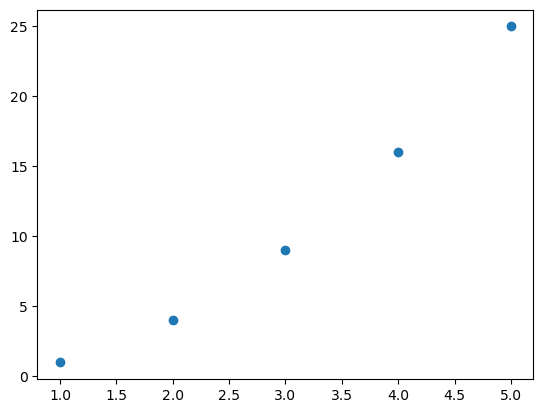

In [27]:
plt.scatter(x,y)

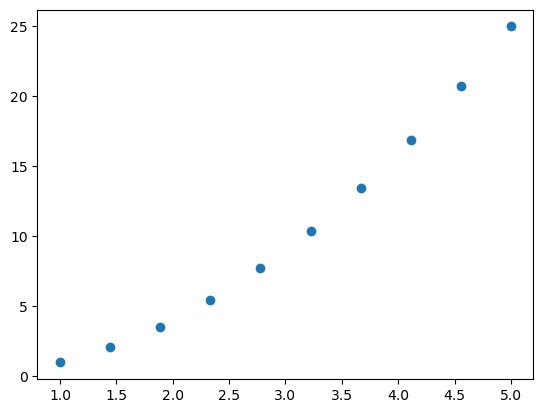

In [28]:
plt.scatter(x_n,y_inter)

# Class 156 Handling Outliers

In [1]:
import numpy as np

In [4]:
marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

In [13]:
mini,q1,median,q3,maxi=np.quantile(marks,[0,0.25,.5,.75,1])

In [15]:
mini,q1,median,q3,maxi

(32.0, 54.0, 67.0, 89.0, 99.0)

In [17]:
iqr = q3-q1
iqr

35.0

In [18]:
lower= q1-1.5*iqr
high=q3+1.5*iqr

In [20]:
lower,high

(1.5, 141.5)

In [21]:
import seaborn as sns

In [27]:
marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<AxesSubplot: >

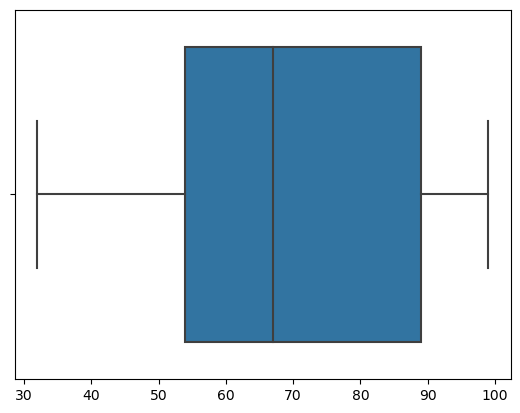

In [28]:
sns.boxplot(x=marks)

In [38]:
marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]

<AxesSubplot: >

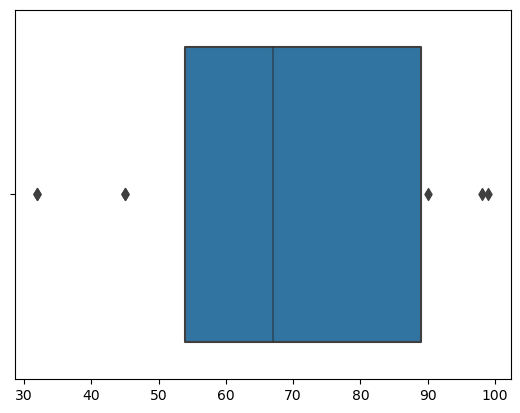

In [39]:
sns.boxenplot(x=marks)


## Feature Scaling

1. Standardization
2. Normalization-Min Max Scaler
3. Unit Vector

In [28]:
import seaborn as sns

In [2]:
df=sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
import numpy as np

In [6]:
mean = np.mean(df['total_bill'])
std =np.std(df['total_bill'])
print(mean, std)

19.78594262295082 8.88415057777113


In [7]:
nom_data=[]
for i in list(df['total_bill']):
    z=(i-mean)/std
    nom_data.append(z)

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

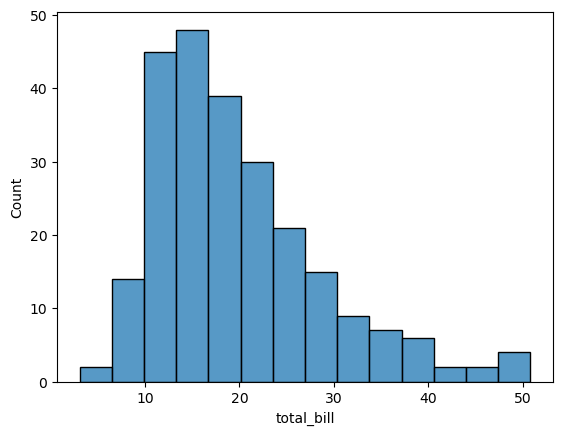

In [12]:
sns.histplot(df['total_bill'])

<AxesSubplot: ylabel='Count'>

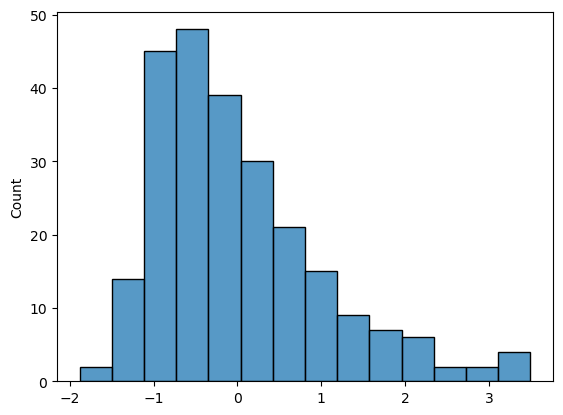

In [13]:
sns.histplot(nom_data)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
scaler.fit([df['total_bill']])

StandardScaler()

In [17]:
scaler.transform([df['total_bill']])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [21]:
scaler.fit_transform([df['total_bill']])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [30]:
import pandas as pd
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


## Normalization--Min Max Scaler

In [32]:
df= sns.load_dataset('taxis')

In [33]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
min_max=MinMaxScaler()

In [37]:
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [41]:
min_max.transform([[1.6,7.0,2.15]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.04359673, 0.04026846, 0.06475904]])

## Unit Vector

In [42]:
from sklearn.preprocessing import normalize

In [46]:
pd.DataFrame(normalize(df[['distance','fare','tip']]))

,0,1,2
0,0.213461,0.933894,0.286839
1,0.156064,0.987747,0.000000
2,0.171657,0.939731,0.295702
3,0.267899,0.939386,0.213971
4,0.231742,0.965592,0.118017
...,...,...,...
6428,0.160133,0.960800,0.226322
6429,0.307453,0.951563,0.000000
6430,0.250500,0.968117,0.000000
6431,0.183497,0.983020,0.000000


# Encoding

Nominal/OHE :
    

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.DataFrame({'color':['red','blue','green','green','red','blue']})

In [49]:
endco = OneHotEncoder()

In [53]:
encoded =endco.fit_transform(df[['color']]).toarray()

In [57]:
encoded_df= pd.DataFrame(encoded,columns=endco.get_feature_names_out())

In [58]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [59]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


# Label Encoder`

In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [5]:
lable_en= LabelEncoder()

In [6]:
lable_en.fit_transform(df[['color']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
orderE = OrdinalEncoder(categories=[['red','green','blue']])

In [13]:
df = pd.DataFrame({'color':['red','blue','green','green','red','blue']})

In [14]:
orderE.fit_transform(df[['color']])

array([[0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.]])

# Class 172 Covariance and Correlation With Python

In [1]:
import seaborn as sns

In [7]:
df =sns.load_dataset('healthexp')

In [8]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [9]:
import numpy as np

In [13]:
# covariance

np.cov(df['Spending_USD'],df['Life_Expectancy'])

array([[4.81776066e+06, 4.16680091e+03],
       [4.16680091e+03, 1.07339023e+01]])

In [12]:
df.cov()

/tmp/ipykernel_225/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


# correlation

In [17]:
df.corr(method='spearman')

/tmp/ipykernel_225/1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [18]:
df.corr()

/tmp/ipykernel_225/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [20]:
df2 =sns.load_dataset('penguins')

In [21]:
df2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [22]:
df2.cov()

/tmp/ipykernel_225/3825087732.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.cov()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.807054,-2.534234,50.375765,2605.591912
bill_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [23]:
df2.corr()

/tmp/ipykernel_225/1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000
